#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import numpy as np

#1-a

##Plot the Dataset

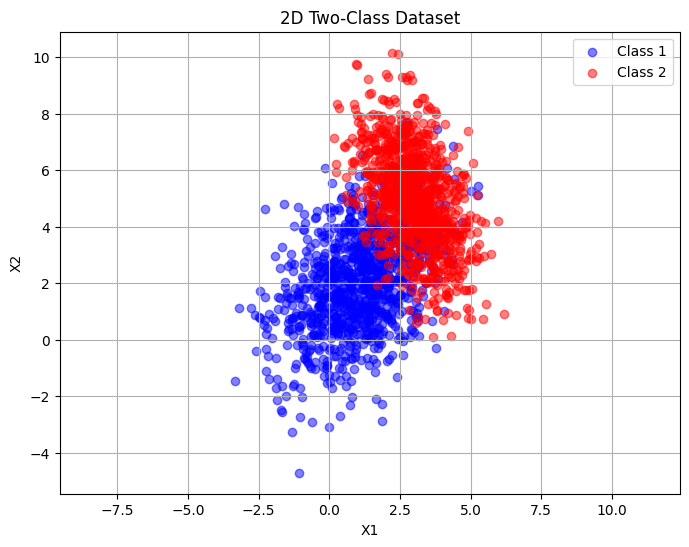

In [ ]:
mu1 = [1, 2]
mu2 = [3, 5]

cov_matrix1 = [[2, 1],
          [1, 3]]

cov_matrix2 = [[1, -0.8],
          [-0.8, 3]]

n_samples = 1000

# Sample creation
class1 = np.random.multivariate_normal(mu1, cov_matrix1, n_samples)
class2 = np.random.multivariate_normal(mu2, cov_matrix2, n_samples)

class1 -= np.mean(class1, axis=0) - mu1
class2 -= np.mean(class2, axis=0) - mu2

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], c='blue', label='Class 1', alpha=0.5)
plt.scatter(class2[:, 0], class2[:, 1], c='red', label='Class 2', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Two-Class Dataset')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

#1-b

##Splitting Class 1 and Class 2 into Training and Test Datasets

In [ ]:
X_train_class1, X_test_class1 = train_test_split(class1, test_size=0.2, random_state=42)
X_train_class2, X_test_class2 = train_test_split(class2, test_size=0.2, random_state=42)

##Mean of Class 1 Training Set

In [ ]:
X_train_class1_x1_sum = 0
X_train_class1_x2_sum = 0

for i in X_train_class1:
  X_train_class1_x1_sum += i[0]
  X_train_class1_x2_sum += i[1]

X_train_class1_x1_mean = X_train_class1_x1_sum/800
X_train_class1_x2_mean = X_train_class1_x2_sum/800

print("Class 1 x1 mean: ", X_train_class1_x1_mean)
print("Class 1 x2 mean: ", X_train_class1_x2_mean)

Class 1 x1 mean:  1.0243737012162313
Class 1 x2 mean:  2.003704530694493


##Covariance Matrix of Class 1 Training Set

In [ ]:
class1_means = np.array([[X_train_class1_x1_mean, X_train_class1_x2_mean]])
X_train_class1_centered = X_train_class1 - class1_means

In [ ]:
X_train_class1_cov_matrix = (X_train_class1_centered.T @ X_train_class1_centered) / (X_train_class1_centered.shape[0])
print("Covariance Matrix of Class 1 Training Set: ")
print(X_train_class1_cov_matrix)

Covariance Matrix of Class 1 Training Set: 
[[1.98543696 0.97002468]
 [0.97002468 3.04867979]]


##Mean of Class 2 Training Set

In [ ]:
X_train_class2_x1_sum = 0
X_train_class2_x2_sum = 0

for i in X_train_class2:
  X_train_class2_x1_sum += i[0]
  X_train_class2_x2_sum += i[1]

X_train_class2_x1_mean = X_train_class2_x1_sum/800
X_train_class2_x2_mean = X_train_class2_x2_sum/800

print("Class 2 x1 mean: ", X_train_class2_x1_mean)
print("Class 2 x2 mean: ", X_train_class2_x2_mean)

Class 2 x1 mean:  3.009585326228859
Class 2 x2 mean:  5.018832540895357


##Covariance Matrix of Class 2 Training Set

In [ ]:
class2_means = np.array([[X_train_class2_x1_mean, X_train_class2_x2_mean]])
X_train_class2_centered = X_train_class2 - class2_means

In [ ]:
X_train_class2_cov_matrix = (X_train_class2_centered.T @ X_train_class2_centered) / (X_train_class2_centered.shape[0])
print("Covariance Matrix of Class 2 Training Set: ")
print(X_train_class2_cov_matrix)

Covariance Matrix of Class 2 Training Set: 
[[ 1.04466239 -0.82717713]
 [-0.82717713  2.89386274]]


#1-c

##Implementation of Quadratic Discriminant Classifier

In [ ]:
prior1 = 0.5
prior2 = 0.5

def qdc(x, mu, cov, prior):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    diff = x - mu
    term = -0.5 * diff @ inv @ diff.T
    return term - 0.5 * np.log(det) + np.log(prior)

def predict(x):
    g1 = qdc(x, class1_means, X_train_class1_cov_matrix, prior1)
    g2 = qdc(x, class2_means, X_train_class2_cov_matrix, prior2)
    return 0 if g1 > g2 else 1

## Training Error for Class 1

In [ ]:
train_preds = np.array([predict(x) for x in X_train_class1])
train_error = np.mean(train_preds != 0)
print("Train Error:", train_error)

Train Error: 0.145


##Training Error for Class 2

In [ ]:
train_preds = np.array([predict(x) for x in X_train_class2])
train_error = np.mean(train_preds != 1)
print("Train Error:", train_error)

Train Error: 0.0625


##Plot for Training Set

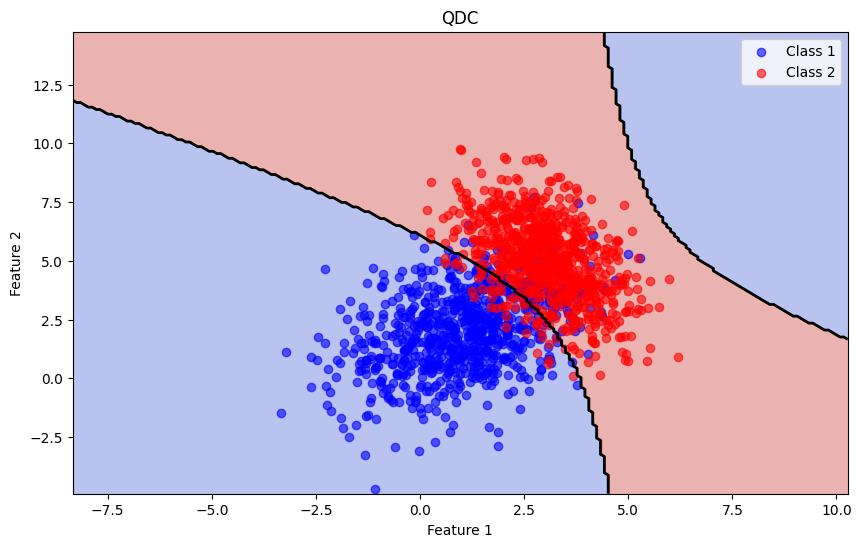

In [ ]:
def plot_qdc_boundary():
    # Creating meshgrid
    x_min, x_max = X_train_class1[:, 0].min() - 5, X_train_class1[:, 0].max() + 5
    y_min, y_max = X_train_class2[:, 1].min() - 5, X_train_class2[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict over meshgrid
    Z = np.array([predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X_train_class2[:, 0], X_train_class2[:, 1], color='red', label='Class 2', alpha=0.6)

    # Decision Boundry
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

    plt.title('QDC')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_qdc_boundary()

##Test Error for Class 1

In [ ]:
train_preds = np.array([predict(x) for x in X_test_class1])
train_error = np.mean(train_preds != 0)
print("Test Error:", train_error)

Test Error: 0.11


##Test Error for Class 2

In [ ]:
train_preds = np.array([predict(x) for x in X_test_class2])
train_error = np.mean(train_preds != 1)
print("Test Error:", train_error)

Test Error: 0.055


##Plot for Test Set

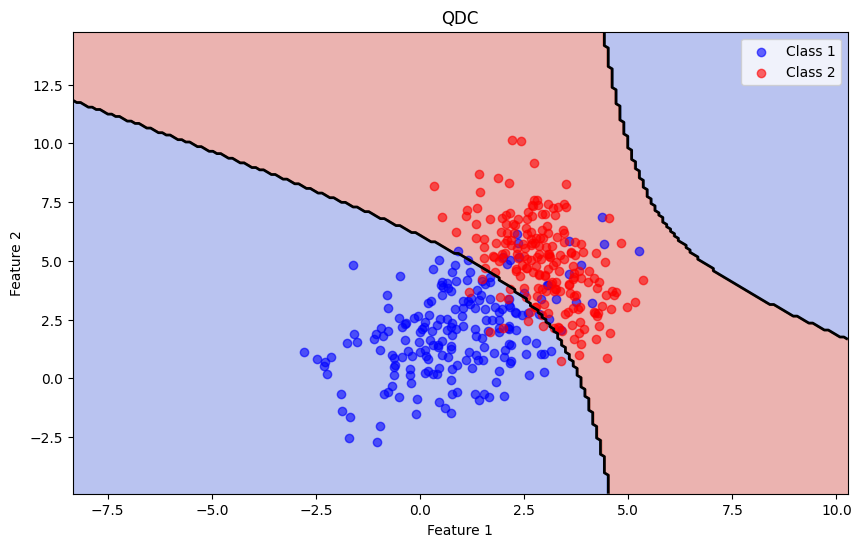

In [ ]:
def plot_qdc_boundary():

    x_min, x_max = X_train_class1[:, 0].min() - 5, X_train_class1[:, 0].max() + 5
    y_min, y_max = X_train_class2[:, 1].min() - 5, X_train_class2[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = np.array([predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_test_class1[:, 0], X_test_class1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X_test_class2[:, 0], X_test_class2[:, 1], color='red', label='Class 2', alpha=0.6)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

    plt.title('QDC')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_qdc_boundary()

#1-d

#finding shared covariance matrix

In [ ]:
ldc_cov_matrix = (X_train_class1_cov_matrix  + X_train_class2_cov_matrix ) / 2
print(ldc_cov_matrix)

[[1.51504967 0.07142378]
 [0.07142378 2.97127126]]


##Implementation of Linear Discriminant Classifier

In [ ]:
def ldc(x, mu, Sigma, prior):
    inv = np.linalg.inv(Sigma)
    return x @ inv @ mu.T - 0.5 * mu @ inv @ mu.T + np.log(prior)

def predict_ldc(x):
    g1 = ldc(x, class1_means, ldc_cov_matrix, prior1)
    g2 = ldc(x, class2_means, ldc_cov_matrix, prior2)
    return 0 if g1 > g2 else 1

##Training Error for Class 1

In [ ]:
train_preds = np.array([predict_ldc(x) for x in X_train_class1])
train_error = np.mean(train_preds != 0)
print("Train Error:", train_error)

Train Error: 0.1825


##Training Error for Class 2

In [ ]:
train_preds = np.array([predict_ldc(x) for x in X_train_class2])
train_error = np.mean(train_preds != 1)
print("Train Error:", train_error)

Train Error: 0.05


##Plot for Training Set

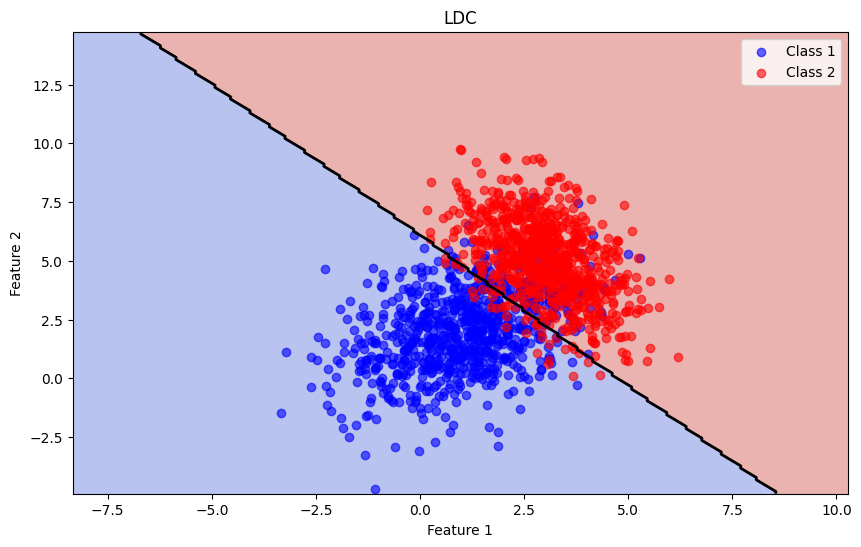

In [ ]:
def plot_ldc_boundary():

    x_min, x_max = X_train_class1[:, 0].min() - 5, X_train_class1[:, 0].max() + 5
    y_min, y_max = X_train_class2[:, 1].min() - 5, X_train_class2[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = np.array([predict_ldc(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X_train_class2[:, 0], X_train_class2[:, 1], color='red', label='Class 2', alpha=0.6)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

    plt.title('LDC')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_ldc_boundary()

##Test Error for Class 1

In [ ]:
train_preds = np.array([predict_ldc(x) for x in X_test_class1])
train_error = np.mean(train_preds != 0)
print("Test Error:", train_error)

Test Error: 0.135


##Test Error for Class 2

In [ ]:
train_preds = np.array([predict_ldc(x) for x in X_test_class2])
train_error = np.mean(train_preds != 1)
print("Test Error:", train_error)

Test Error: 0.045


##Plot for Test Set

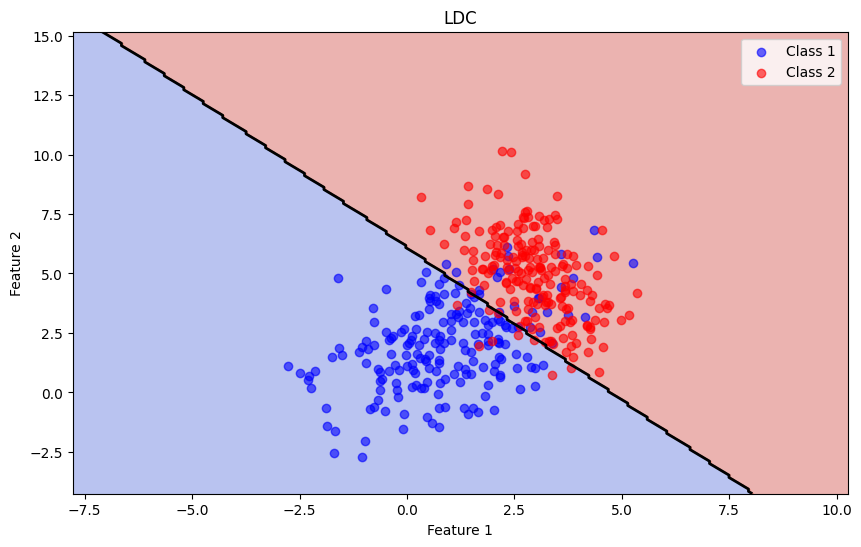

In [ ]:
def plot_ldc_boundary():

    x_min, x_max = X_test_class1[:, 0].min() - 5, X_test_class1[:, 0].max() + 5
    y_min, y_max = X_test_class2[:, 1].min() - 5, X_test_class2[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = np.array([predict_ldc(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_test_class1[:, 0], X_test_class1[:, 1], color='blue', label='Class 1', alpha=0.6)
    plt.scatter(X_test_class2[:, 0], X_test_class2[:, 1], color='red', label='Class 2', alpha=0.6)

    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

    plt.title('LDC')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_ldc_boundary()

#2

##Reading the Dataset and Splitting the Features and Class Labels

In [ ]:
df = pd.read_csv('data.txt', header=None)
np_array = df.to_numpy()
X = np_array[:, :-1]
y = np_array[:, -1]

##Step 1: Calculating the Mean Vector

In [ ]:
classes = np.unique(y)
means = {}
for c in classes:
    X_c = X[y == c]
    means[c] = np.sum(X_c, axis=0) / X_c.shape[0]

mean_vector = np.sum(X, axis=0) / X.shape[0]

##Step 2: Calculating the Covariance Matrix

In [ ]:
X_centered = X - mean_vector
n_features = X.shape[1]
cov_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        cov_matrix[i, j] = np.sum(X_centered[:, i] * X_centered[:, j]) / (X.shape[0] - 1)

##Step 3: Calculating the Eigenvalues and Eigenvectors

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

##Step 4: Calculating the Two Eigenvectors with the Largest Eigenvalues

In [ ]:
sorted_indices = np.argsort(eig_vals)[::-1]
top_2_eig_vecs = eig_vecs[:, sorted_indices[:2]]

##Step 5: Projecting the Dataset into the Components

In [ ]:
X_reduced = X_centered @ top_2_eig_vecs

##Step 6: Visaulization

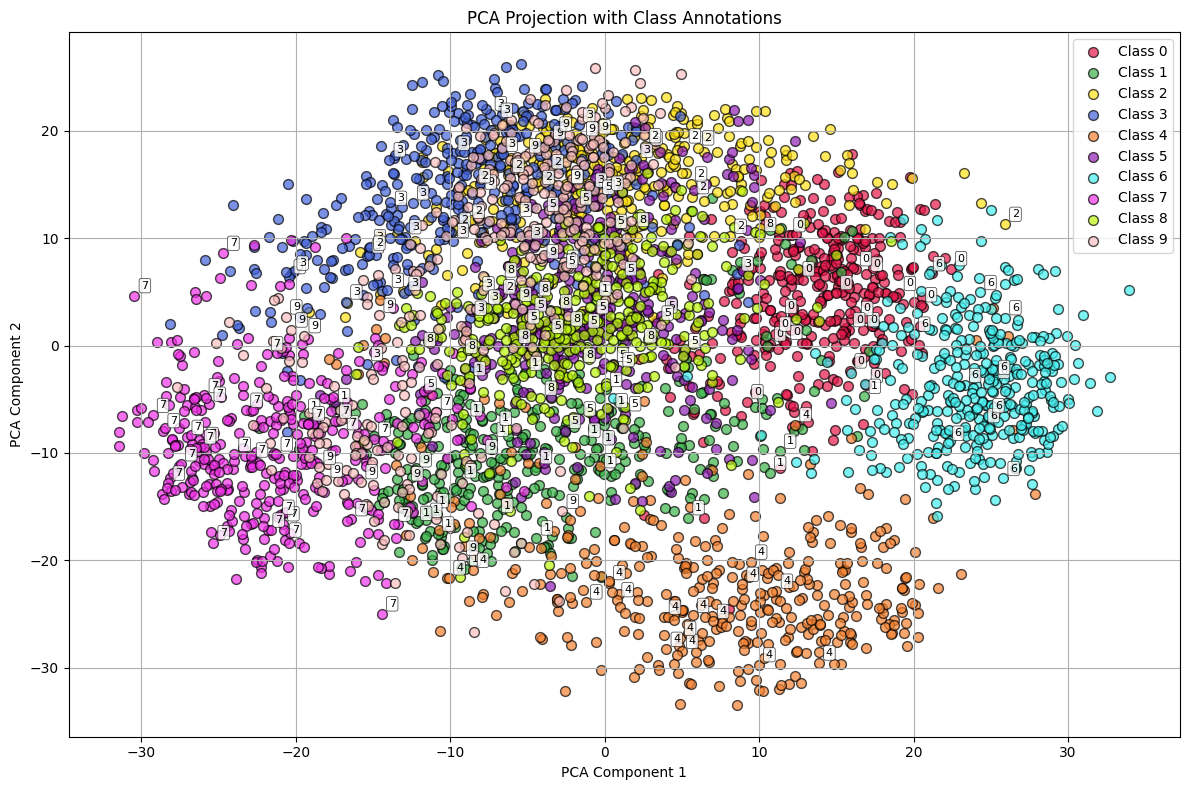

In [ ]:
colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe'
]

plt.figure(figsize=(12, 8))

classes = np.unique(y)
for cls in classes:
    class_data = X_reduced[y == cls]
    plt.scatter(
        class_data[:, 0],
        class_data[:, 1],
        color=colors[int(cls) % len(colors)],
        label=f'Class {int(cls)}',
        s=50,
        alpha=0.7,
        edgecolor='k'
    )

np.random.seed(42)
indices = np.random.choice(len(X_reduced), size=min(200, len(X_reduced)), replace=False)
for idx in indices:
    x, y_val = X_reduced[idx]
    label = str(int(y[idx]))
    plt.annotate(
        label,
        (x, y_val),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=0.5, alpha=0.8)
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection with Class Annotations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#3

##Step 1: Calculating the Mean Vector

In [ ]:
classes = np.unique(y)
means = {}
for c in classes:
    X_c = X[y == c]
    means[c] = np.sum(X_c, axis=0) / X_c.shape[0]

mean_vector = np.sum(X, axis=0) / X.shape[0]

##Step 2: Calculating the Within-Class Scatter Matrix (Sw) and the Between-Class Scatter Matrix (Sb)

In [ ]:
n_features = X.shape[1]
Sw = np.zeros((n_features, n_features))
Sb = np.zeros((n_features, n_features))

for cls in classes:
    X_c = X[y == cls]
    # Sw = (X - mean)^T @ (X - mean)
    centered = X_c - means[cls]
    Sw += centered.T @ centered

    # Sb = n * (mean_diff)^T @ (mean_diff)
    n_c = X_c.shape[0]
    mean_diff = (means[cls] - mean_vector).reshape(n_features, 1)
    Sb += n_c * (mean_diff @ mean_diff.T)

##Step 3: Calculating Matrix Multiplication of the Inverse of Sw with Sb

In [ ]:
eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)

##Step 4: Calculating the Two Eigenvectors with the Largest Eigenvalues

In [ ]:
sorted_indices = np.argsort(-eigvals.real)
W = eigvecs[:, sorted_indices[:2]].real

##Step 5: Projecting the Dataset

In [ ]:
X_lda = X @ W

##Step 6: Visaulization

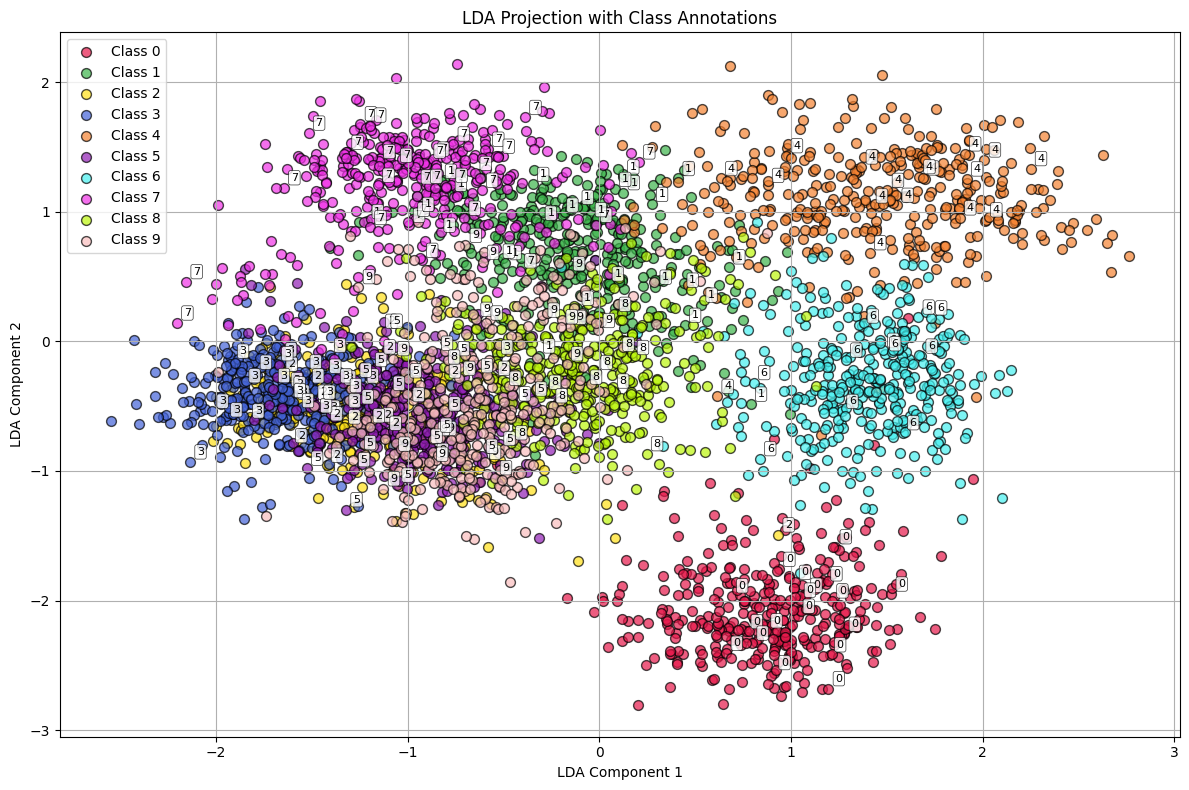

In [ ]:
colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe'
]

plt.figure(figsize=(12, 8))

classes = np.unique(y)
for cls in classes:
    class_data = X_lda[y == cls]
    plt.scatter(
        class_data[:, 0],
        class_data[:, 1],
        color=colors[int(cls)],
        label=f'Class {int(cls)}',
        s=50,
        alpha=0.7,
        edgecolor='k'
    )

np.random.seed(42)
indices = np.random.choice(len(X_lda), size=200, replace=False)
for idx in indices:
    x, y_val = X_lda[idx]
    label = str(int(y[idx]))
    plt.annotate(
        label,
        (x, y_val),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=0.5, alpha=0.8)
    )

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection with Class Annotations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()